**Cryptocurrency Liquidity Prediction for Market Stability**

**Life Cycle Of ML Project**
1. Understanding the problem statement
2. Data collection
3. Data checks to perform
4. Adding new feature(if any) 
5. EDA
6. Data pre-processing
7. Model training
8. Choose the best model

**1. Problem Statement :**
Cryptocurrency markets are highly volatile, and liquidity plays a crucial role in market stability. Liquidity refers to
the ease with which assets can be bought or sold without significantly impacting the price. A lack of liquidity
can lead to increased price fluctuations and market instability.


In this project, I am to build a machine learning model to predict cryptocurrency liquidity levels
based on various market factors such as trading volume, transaction patterns, exchange listings, and social
media activity. The objective is to detect liquidity crises early to help traders and exchange platforms
manage risks effectively.


Your final model should provide insights into market stability by forecasting liquidity variations, allowing
traders and financial institutions to make informed decisions

**2. Data Collection**
* Dataset Source - The dataset consists of records from 2016 and 2017.

Dataset : - https://drive.google.com/drive/folders/10BRgPip2Zj_56is3DilJCowjfyT6E9AM

2.1 Import Data and requried packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Import Data set

In [2]:
df = pd.read_csv("E:/Users/USER/Desktop/DataAnalyticsAndgenAI/ML Project/ML Project/notebook/data/coin_gecko_2022_03_17.csv")

Show Top 5 Records and Random Records

In [3]:
df.head(5)

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17


In [4]:
df.sample(2)

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
204,Ronin,RON,1.930000,0.000,0.036,-0.039,2336649.0,285584777.0,2022-03-17
356,DEAPCOIN,DEP,0.027102,-0.008,-0.018,-0.159,5123322.0,126235341.0,2022-03-17


**3. Data Checks To Perform**

* Shape of dataset
* Check missing values
* Check duplicates
* Check data type
* Check the number of unique values of each columns
* Check statistics of dataset
* Define numerical and categorical column

3.1 Shape of dataset

In [5]:
df.shape

(500, 9)

3.2 Check missing values

In [6]:
df.isna().sum()

coin          0
symbol        0
price         0
1h            4
24h           4
7d            5
24h_volume    4
mkt_cap       0
date          0
dtype: int64

Action: Since there are only a few missing values, I removed the records (rows) containing NULL values

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.shape

(495, 9)

In [9]:
df = df.reset_index()

In [10]:
df.drop("index",axis=1,inplace=True)

3.3 Check duplicates

In [11]:
df.duplicated().sum()

0

Action: No action required because all records are unique

3.4 Check data type

In [12]:
df.dtypes

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object

Note : All data types are correct

3.5 Check the number of unique values of each columns

In [13]:
def check_unique_value(column):
    print("Column name:",str(column),df[column].unique)
    print("Total number of unique values: ",df[column].nunique())
    print("--------------------")

In [14]:
list_all_column = list(df.columns)
for i in list_all_column:
    check_unique_value(i)

Column name: coin <bound method Series.unique of 0                Bitcoin
1               Ethereum
2                 Tether
3                    BNB
4               USD Coin
             ...        
490              IRISnet
491    Circuits of Value
492           ARPA Chain
493            SuperRare
494           Verus Coin
Name: coin, Length: 495, dtype: object>
Total number of unique values:  495
--------------------
Column name: symbol <bound method Series.unique of 0        BTC
1        ETH
2       USDT
3        BNB
4       USDC
       ...  
490     IRIS
491    COVAL
492     ARPA
493     RARE
494     VRSC
Name: symbol, Length: 495, dtype: object>
Total number of unique values:  492
--------------------
Column name: price <bound method Series.unique of 0      40851.380000
1       2824.420000
2          1.000000
3        389.610000
4          0.999739
           ...     
490        0.055426
491        0.037961
492        0.069003
493        0.464613
494        0.999387
Name: price, Len

3.6 Check statistics of datset

In [15]:
df.describe()


,price,1h,24h,7d,24h_volume,mkt_cap
count,4.950000e+02,495.000000,495.000000,495.000000,4.950000e+02,4.950000e+02
mean,5.833849e+02,0.000582,0.019168,0.008038,2.491049e+08,3.823557e+09
std,4.248706e+03,0.033087,0.058928,0.252549,2.287919e+09,3.846057e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,4.349000e+01,6.731896e+07
25%,2.040150e-01,-0.001000,0.000000,-0.051500,1.747366e+06,1.198010e+08
50%,1.100000e+00,0.001000,0.011000,-0.014000,7.848894e+06,2.180627e+08
75%,7.065000e+00,0.004000,0.030000,0.020000,3.537307e+07,6.103960e+08
max,4.090907e+04,0.095000,0.577000,4.608000,4.413140e+10,7.760774e+11


In [16]:
df.corr(numeric_only=True)

,price,1h,24h,7d,24h_volume,mkt_cap
price,1.000000,-0.006380,-0.016317,0.008834,0.170351,0.398865
1h,-0.006380,1.000000,0.551244,0.110909,0.002707,0.004368
24h,-0.016317,0.551244,1.000000,0.509094,-0.005532,-0.012708
7d,0.008834,0.110909,0.509094,1.000000,0.021971,-0.004894
24h_volume,0.170351,0.002707,-0.005532,0.021971,1.000000,0.559681
mkt_cap,0.398865,0.004368,-0.012708,-0.004894,0.559681,1.000000


Insight: They had good relationship between their 24-hour trading volume and market cap.

3.7 Define numerical and categorical column

In [17]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [82]:
df["Liquidity_score"] = df["24h_volume"]/df["mkt_cap"]


In [19]:
df["Liquidity_score"].min(),df["Liquidity_score"].max()

(9.722858811232702e-08, 5.9485448576620605)

**5. EDA**

Q.1 What are the top 10 cryptocurrencies by market capitalization?

In [20]:
df.groupby("coin")["mkt_cap"].max().sort_values(ascending=False)[0:10]

coin
Bitcoin      7.760774e+11
Ethereum     3.390772e+11
Tether       8.020588e+10
BNB          6.556116e+10
USD Coin     5.259607e+10
XRP          3.834236e+10
Terra        3.225657e+10
Solana       2.927060e+10
Cardano      2.689173e+10
Avalanche    2.128204e+10
Name: mkt_cap, dtype: float64

Q.2 Which cryptocurrencies experienced the highest and lowest price changes over the last 24 hours?

In [21]:
high_change_24 = df[df["24h"] == df["24h"].max()]["coin"]
low_change_24 = df[df["24h"] == df["24h"].min()]["coin"]

high_change_24,low_change_24


(77    Xido Finance
 Name: coin, dtype: object,
 430    bZx Protocol
 Name: coin, dtype: object)

Insight: 
* Xido Finance had the highest price change in the past 24 hours
* bZx Protocol had the lowest price change in the past 24 hours

Q.3 Which cryptocurrencies had the most significant price changes over the past 7 days?

In [22]:
df[df["7d"].max() == df["7d"]]["coin"]

154    STEPN
Name: coin, dtype: object

Insight:
* STEPN had the most significant changes over the past 7 days

Q.4 How does the price volatility (1h, 24h, 7d) vary among the top 20 coins?

<Axes: xlabel='coin'>

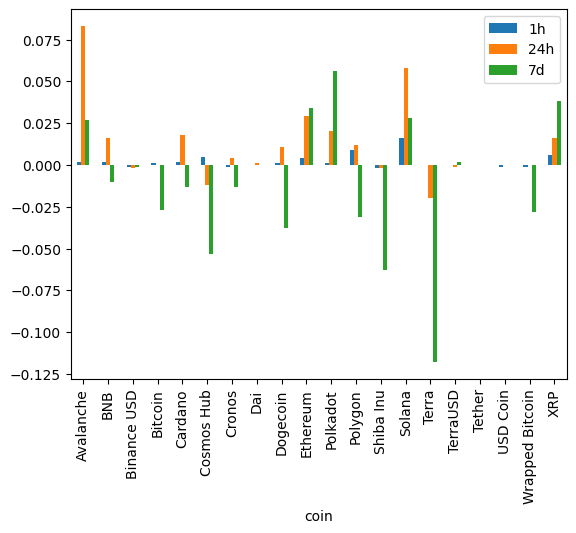

In [23]:
df_top20Coin = df[["coin","mkt_cap","1h","24h","7d"]].sort_values(by="mkt_cap",ascending=False)[0:20]
df_top20Coin.groupby("coin")[["1h","24h","7d"]].max().plot.bar()


Insights
* In case of Terra coin,The price volatility more vary compare to others

Q.5 Which cryptocurrencies have a high trading volume but relatively low market cap?

In [24]:
# Define a threshold for low market cap
low_cap_threshold = 10000000000
df[df["mkt_cap"] < low_cap_threshold].sort_values(by="24h_volume",ascending=False)

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,Liquidity_score
154,STEPN,GMT,7.611810e-01,0.013,0.425,4.608,1.358531e+09,4.562513e+08,2022-03-17,2.977594e+00
191,FLEX Coin,FLEX,3.950000e+00,-0.000,-0.001,0.006,1.321112e+09,3.115018e+08,2022-03-17,4.241107e+00
27,Bitcoin Cash,BCH,2.976500e+02,0.002,0.006,-0.035,1.192569e+09,5.652414e+09,2022-03-17,2.109841e-01
35,The Sandbox,SAND,3.210000e+00,0.004,0.042,0.083,1.054427e+09,3.671953e+09,2022-03-17,2.871569e-01
83,Celo,CELO,3.010000e+00,-0.025,0.195,0.044,7.464944e+08,1.293158e+09,2022-03-17,5.772646e-01
...,...,...,...,...,...,...,...,...,...,...
283,Pundi X [OLD],NPXS,7.390373e-04,0.005,0.230,-0.056,3.233810e+03,1.750215e+08,2022-03-17,1.847664e-05
52,cUSDC,CUSDC,2.255757e-02,0.002,0.001,0.001,1.167720e+03,2.466485e+09,2022-03-17,4.734350e-07
207,SafeMoon [OLD],SAFEMOON,5.154230e-07,0.002,0.020,-0.009,8.791600e+02,2.778007e+08,2022-03-17,3.164715e-06
60,cDAI,CDAI,2.193790e-02,0.000,0.001,0.001,1.875400e+02,1.928857e+09,2022-03-17,9.722859e-08


Insights: 
* STEPN	have high trending volume but relatively they have low market cap

Q.6 How many coins experienced positive growth across all three timeframes (1h, 24h, 7d)?

In [25]:
len(df[((df["1h"] >= 0) & (df["24h"] >= 0) & (df['7d'] >= 0))])

121

Insights:
* 121 coins experienced positive growth across all three timeframes

Q.7 Which coins have the highest market cap and how do they compare visually?
→ Bar chart of top 10 coins by market cap.

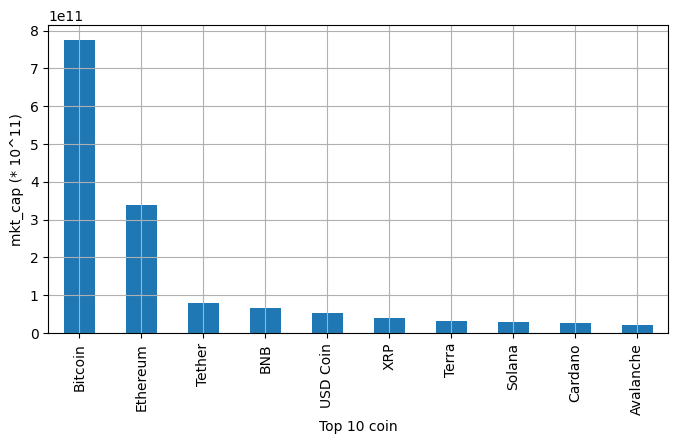

In [26]:
plt.figure(figsize=(8,4))
df.groupby(df["coin"])["mkt_cap"].max().sort_values(ascending=False)[0:10].plot.bar()
plt.xlabel("Top 10 coin")
plt.ylabel("mkt_cap (* 10^11)")
plt.grid()
plt.show()

Q.8 How are 24h trading volume and market cap related?
→ Scatter plot with log scales.

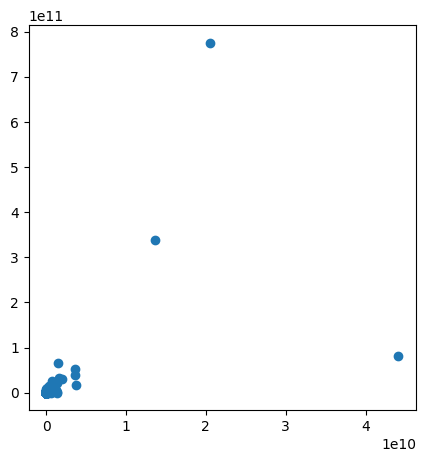

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(df["24h_volume"],df["mkt_cap"])
plt.show()

Note : 3 outlier data are here so need outlier treatment

Q.9 Which coins had consistent positive growth across 1h, 24h, and 7d?
→ Venn diagram or grouped bar chart for time-based changes.

<Axes: xlabel='coin'>

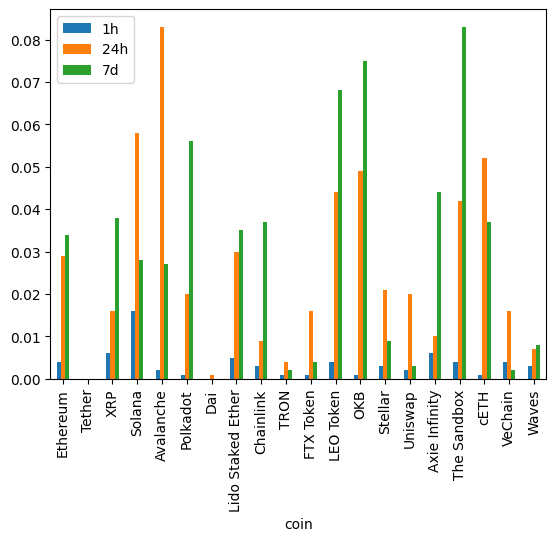

In [28]:

df[((df["1h"] >= 0) & (df["24h"] >= 0) & (df['7d'] >= 0))][["coin","1h","24h","7d"]][0:20].plot.bar(x="coin")

Q.10 What percentage of coins had positive vs. negative changes over the last 24 hours?
→ Pie chart or bar chart (count of positive/negative).

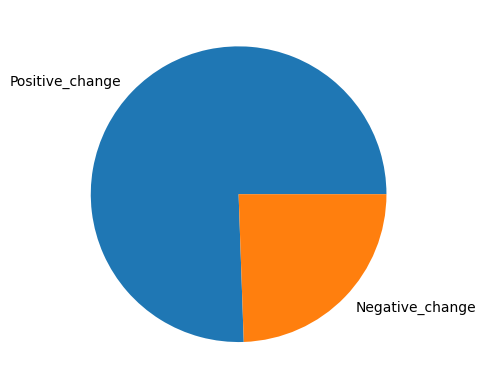

In [29]:
positive_change = (len(df[df["24h"] >= 0]) / len(df)) * 100
negative_change = (len(df[df["24h"] < 0]) / len(df)) * 100
changes = ["Positive_change","Negative_change"]
plt.pie(x=[positive_change,negative_change],labels=changes)

plt.show()


**Model Train**

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings("ignore")

Define X and Y

In [73]:
df.columns

Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date', 'Liquidity_score'],
      dtype='object')

In [83]:
x = df.drop(["coin","symbol","date","mkt_cap"],axis=1)
y = df["mkt_cap"]

Train-Test split

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [85]:
x_train.shape,x_test.shape

((396, 6), (99, 6))

Create an Evaluate Function to give all metrics after model Training

In [86]:
def evaluate_model(true,predicted):
    r2 = r2_score(true,predicted)
    mse = mean_squared_error(true,predicted)
    return r2,mse

In [87]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "Decision TreeRegressor": DecisionTreeRegressor(),
    "RandomForest Regressor" : RandomForestRegressor(),
    "SVR" : SVR()
}

model_list = []
r2_List = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    #Train model
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Evaluate The model
    model_train_r2,model_train_mse = evaluate_model(y_train,y_train_pred)
    model_test_r2,model_test_mse = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model performance for training set")
    print("r2 score",model_train_r2)
    print("MSE ",model_train_mse)

    

    print("Model performance for test set")
    print("r2 score",model_test_r2)
    print("MSE ",model_test_mse)
    print("--------------------")
    r2_List.append(model_test_r2)


Linear Regression
Model performance for training set
r2 score 0.40686465765971125
MSE  1.085783506744696e+21
Model performance for test set
r2 score 0.7492502636285394
MSE  1.3670649939784157e+19
--------------------
Lasso
Model performance for training set
r2 score 0.4068646576597116
MSE  1.0857835067446953e+21
Model performance for test set
r2 score 0.7492502747957992
MSE  1.3670649330955198e+19
--------------------
Ridge
Model performance for training set
r2 score 0.4068579344286616
MSE  1.0857958141775273e+21
Model performance for test set
r2 score 0.7499278438004827
MSE  1.3633708878665538e+19
--------------------
Decision TreeRegressor
Model performance for training set
r2 score 1.0
MSE  0.0
Model performance for test set
r2 score 0.19669877233392885
MSE  4.379525992144414e+19
--------------------
RandomForest Regressor
Model performance for training set
r2 score 0.879618402166887
MSE  2.2036851307332508e+20
Model performance for test set
r2 score 0.8770582986258721
MSE  6.702670

In [88]:
pd.DataFrame(list(zip(model_list,r2_List)),columns=["Model_List","r2_score"]).sort_values(by=["r2_score"],ascending=False)

,Model_List,r2_score
4,RandomForest Regressor,0.877058
2,Ridge,0.749928
1,Lasso,0.749250
0,Linear Regression,0.749250
3,Decision TreeRegressor,0.196699
5,SVR,-0.055846
